In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [67]:
def readData():   
    import numpy as np
   
    data = pd.read_csv('WindramTrainingData.csv', index_col = [0])
    metadata = pd.read_csv('WindramMetaData.csv', index_col = [0])
    
    #data = pd.read_csv('selectedGenes_Marques1.csv', index_col = [0])
    df = pd.DataFrame(data)
    df = np.transpose(df)
    colsums = df.sum(axis=0)
    #print(colsums)
    normalized = df.div(colsums)
    #print(array, "_", colsums)
    #print(normalized.shape)
    data1 = normalized
    #data1 = np.transpose(normalized)
    return data, data1, metadata

In [9]:
from collections import Counter

data, data1, metadata = readData()
data
actual_capture_time = metadata['obstime'].values


unique = set(actual_capture_time)
count_array = Counter(actual_capture_time) 
unique = list(unique)
unique = np.asarray(unique) /6
unique = sorted(unique, reverse=False)
print(unique)

print(count_array)

[6, 18, 30, 42]
Counter({6: 6, 18: 6, 30: 6, 42: 6})


In [10]:
def data_manipulation(data, unique):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    from sklearn.preprocessing import normalize
    #make this example reproducible
    seed(1)
    
    data_with_captureTime = data.copy()
    n = data.shape[1]
    m = data.shape[0]
    
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (m)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    print(dfIni.shape)
    
    array1 = np.arange(1, 101, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
            normDist.loc[k] =  normal(loc=unique[k-1], scale=2, size=100)
    
    for i in range(len(data)):
        arr1 = []
        arr = []
        for j in range(len(unique)):

            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            #print(arr)
            if j == 0 :
                #generate random values from Poisson distribution with mean=3 and sample size=10
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
            
        dfIni.loc[i+1] = arr1
        
        index1 = poisson.rvs(mu=int(len(arr1)/3), size= 3)
        index2 = poisson.rvs(mu=int(len(arr1)/2), size= 3)
        #index = index.astype(int)
        for i in range(len(index1)):
            dfIni.loc[i+1][index1[i]] = 0
            
        for i in range(len(index2)):
            dfIni.loc[i+1][index2[i]] = 0
#         dfIni.loc[i+1] = arr1
#     colsums = dfIni.sum(axis=0)
#     normalized = dfIni.div(colsums)  
    return dfIni

In [11]:
def data_manipulation_with_Gene_mean(data, unique, count_array):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    from sklearn.preprocessing import normalize
    #make this example reproducible
    seed(1)
    
    data_with_captureTime = data.copy()
    n = data.shape[1]
    m = data.shape[0]
    
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (m)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    print(dfIni.shape)
    
    array1 = np.arange(1, 101, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    index = count_array[unique[0]]
    for k in range(1, len(unique)+1):
            #normDist.loc[k] =  normal(loc=unique[k-1], scale=1.5, size=100)
            #ct = unique[k-1]
            
            temp = 0
            if k == 1:
                temp = data.loc[:,1: count_array[unique[k-1]]].mean()
                #index = unique[k-1]
            else:
                temp = data.loc[:,index: (count_array[unique[k-1]])+index].mean()
                index = index + count_array[unique[k-1]]
            print(index)
            normDist.loc[k] =  normal(loc=temp.mean(), scale=1.5, size=100)
            #print(temp.mean())
    for i in range(len(data)):
        arr1 = []
        arr = []
        for j in range(len(unique)):

            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            #print(arr)
            if j == 0:
                #generate random values from Poisson distribution with mean=3 and sample size=10
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                
        #dfIni.loc[i+1] = arr1
        dfIni.loc[i+1] = arr1
        index1 = poisson.rvs(mu=int(len(arr1)/4), size= 3)
        index2 = poisson.rvs(mu=int(len(arr1)/2), size= 3)
        #index = index.astype(int)
        for i in range(len(index1)):
            dfIni.loc[i+1][index1[i]] = 0
            
        for i in range(len(index2)):
            dfIni.loc[i+1][index2[i]] = 0
            print(dfIni.loc[i+1][index2[i]])
        #dfIni.loc[i+1] = arr1
        #dfIni.loc[i+1] = normalize([arr1], norm="max") 
        print(dfIni.loc[i+1][index2[1]])
        dfIni.loc[i+1] = normalize([arr1], norm="max")
    return dfIni

In [12]:
data_temp = data.copy()

n = data.shape[1]
m = data.shape[0]
    
array1 = np.arange(1, n+1, 1)
array2 = np.arange(1, (m)+1, 1)
data_temp.index = array2
data_temp.columns = array1

# Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
# print(Pseudotime)
data_temp = data_temp.fillna(0)
#print(data_temp)

data_with_ct = data_manipulation(data_temp, unique)
meanVariance = data_manipulation_with_Gene_mean(data_temp, unique, count_array)


# data_manipulated = data_with_ct.add(meanVariance)
# data_manipulated = data_temp.add(data_manipulated)

data_manipulated = data_temp.add(meanVariance)
data_manipulated = data_with_ct.mul(data_manipulated)
# print(meanVariance.loc[1])
# print(data_temp.loc[1])
# print(data_manipulated.loc[1])

(100, 24)
(100, 24)
6
12
18
24
0
0
0
nan
0
0
0
0.8024562448261222
0
0
0
0
0
0
0
0.6998735793342165
0
0
0
0.905617771641742
0
0
0
0.8835100800958186
0
0
0
0.8125351439967944
0
0
0
0.7109308194244485
0
0
0
0.74395445506142
0
0
0
0
0
0
0
1.0
0
0
0
0.7019622393998044
0
0
0
0.7202920131716899
0
0
0
0.7782674128817734
0
0
0
0.9476242381393472
0
0
0
0.6171993019559691
0
0
0
0.5450201968595799
0
0
0
0.7512986294198034
0
0
0
0.89484881030329
0
0
0
0
0
0
0
0
0
0
0
0.8198285728978583
0
0
0
0.7170658046959038
0
0
0
0.9748960801557697
0
0
0
0.7851530912318277
0
0
0
0.6680707517295444
0
0
0
1.0
0
0
0
0
0
0
0
0.699246632401755
0
0
0
0.856571388446963
0
0
0
0
0
0
0
0.6905957615608863
0
0
0
0.7282151898989886
0
0
0
0.828744175491936
0
0
0
0.8000075025547801
0
0
0
0.6747105561889175
0
0
0
0.913185950394354
0
0
0
0.6674483649775
0
0
0
0.6242829653442586
0
0
0
0.8050645214946898
0
0
0
0.7567982508635005
0
0
0
0.7944877540620313
0
0
0
0.7398521602987898
0
0
0
0.7907384562356439
0
0
0
0.8159542486359581
0
0

In [14]:
def initialize(data, ntest, unique, count_array):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    #make this example reproducible
    seed(1)
    
    n = data.shape[1]
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (2*ntest)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    
    array1 = np.arange(1, 101, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
        normDist.loc[k] =  normal(loc=unique[k-1], scale=1.5, size=100)
    
    for i in range(1, (2*ntest)+1):
        arr1 = []
        arr = []
        for j in range(len(unique)):   
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            if j == 0 : 
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                
        dfIni.loc[i] = arr1
                
    return dfIni

In [15]:
ntest = 60
initialSol = initialize(data, ntest, unique, count_array)

In [16]:
def crossover(p1, p2):
    print(p1,p2)
    print("p1p2")
    import math
    from numpy import nan
    from scipy import stats
    
    u = np.random.poisson(1, 1)
    if u == 0:
        u = 1
        p2 = p2.iloc[::-1]
      
    c1, c2 = p1.copy(), p2.copy()
    c11 = pd.DataFrame()
    c22 = pd.DataFrame()
    length = len(p1)

    pt = int(length/2)

    
    if u%2 == 1:
        c1[0:pt] = p1.iloc[0:pt]
        c2[(pt):length] = p2.iloc[(pt):length]
        c1[pt: length] = p2.iloc[0:pt]
        c2[0:pt] = p1.iloc[pt:length]
        
    else:
        c2[0:pt] = p2.iloc[0:pt]  
        c1[(pt):length] = p1.iloc[(pt):length]
        c2[pt: length] = p1.iloc[0:pt]
        c1[0:pt] = p2.iloc[pt:length]
        
        
    df = pd.DataFrame()
    df = df.append(c1)
    df = df.append(c2)
    #print(df)
    return df


In [17]:
def recombination(X1):
    test = X1.isnull().values.any()
    #print(test)
    
    N = X1.shape[0]
    n = X1.shape[1]
    #print(N)
    samp = random.sample(range(1,N+1),int(N/2))
    samp = set(samp)
    all = np.arange(1,N+1)
    all = set(all)

    X2 = X1.loc[samp,]

    X3 = X1.loc[all.difference(samp),]

    C1 = pd.DataFrame()
    O_samp =all.difference(samp)
    
    #print(O_samp, samp)
    check = X2.isnull().values.any()
    check1 = X3.isnull().values.any()
    #print(check, check1, "before Crossover")
    for i, j in zip(samp,O_samp):
        #print(X2.loc[i], X3.loc[j])
        
        print(">>>>>>>")
        
        check = X2.loc[i].isnull().values.any()
        check1 = X3.loc[j].isnull().values.any()
      
        
        C11 = crossover(X2.loc[i], X3.loc[j])

        print("<<<<<<")
       
        l = list(samp)
        if i== l[0]:
            C1 = C11
            #C1.append(C22)
        else:
            C1 = C1.append(C11)
            #C1.append(C22)
        
    return C1.sort_index(axis = 0)
    


In [18]:
# test = list(Individual.loc[1])
# print(test)
# print(list(c1.loc[1]))
# print(list(c1.loc[2]))
import random 
c1 = recombination(initialSol)
print(c1)
# test1 = np.unique(list(c1.loc[1])).size == len(list(c1.loc[1]))
# test2 = np.unique(list(c1.loc[2])).size == len(list(c1.loc[2]))
# print(test1, test2)

>>>>>>>
1     7.35128
2     4.59635
3     5.04451
4     8.27973
5     5.54069
6     4.99401
7     18.7548
8     16.2835
9     14.3477
10    16.7107
11    20.9507
12    19.1108
13    30.0248
14    32.9341
15    28.1503
16     31.254
17    30.4271
18    33.6741
19    40.9412
20    40.4672
21    44.0832
22    41.1003
23    41.1638
24    43.2081
Name: 3, dtype: object 1     5.43707
2     5.47599
3     5.04451
4     5.81566
5     6.75374
6     5.51637
7      17.569
8     17.8474
9     19.2164
10    20.9507
11    19.0201
12    18.6052
13    29.5103
14    27.8387
15    30.3027
16    28.2265
17    30.1641
18    28.6642
19    42.4579
20    42.7164
21    42.4864
22    43.6835
23    41.9469
24     40.236
Name: 1, dtype: object
p1p2
<<<<<<
>>>>>>>
1     4.73219
2     8.53868
3     5.47163
4     4.28622
5     7.25848
6     5.55286
7     20.9507
8     15.5588
9     16.1549
10     20.857
11    19.5667
12    19.4795
13    29.5335
14    32.9063
15    28.4331
16     31.254
17    29.8193
18    28.6983
19

In [19]:
def mutation(DataForMutation):
    N_rows = DataForMutation.shape[0]
    n_columns = DataForMutation.shape[1]
    
    
    for i in range(N_rows):
        samp = random.sample(range(0, n_columns),2)
        u1 = min(samp)
        u2 = max(samp)
      
        previous = DataForMutation.iloc[i,u1:u2]
        new = previous.iloc[::-1]
    
        DataForMutation.iloc[i,u1:u2] = list(new)

    return(DataForMutation)
    

In [20]:
forMutation = pd.DataFrame();
forMutation = pd.concat([c1,initialSol], ignore_index=True)

arrayMM = mutation(forMutation)


In [21]:
forCost = pd.DataFrame();
forCost = pd.concat([arrayMM,forMutation], ignore_index=True)

print(forCost)
index = np.array(range(1,len(forCost)+1));


          1        2        3        4        5        6        7        8   \
0    30.0248  32.9341  28.1503   31.254  30.4271  33.6741  40.9412  40.4672   
1    29.5335  38.8288    42.02  28.1704  30.8789  31.0121  32.3382  29.7017   
2    7.35128  4.59635  5.04451  8.27973  5.54069  4.99401  18.7548  16.2835   
3    4.73219  8.53868  5.47163  4.28622  7.25848  16.1549  15.5588  20.9507   
4    30.1937  30.1641  40.9913   42.927  39.8602  42.7164  44.4343  28.4331   
..       ...      ...      ...      ...      ...      ...      ...      ...   
475  6.79553  7.32771  8.43652  7.04705  30.1431  28.4331  25.8104  32.7158   
476  8.53868  4.66856  4.85819  4.32403  5.47163  4.34907  16.1549  19.9398   
477  4.99401  7.04705  5.42392  6.34514  5.71225  5.08237  30.2658  29.3987   
478  6.06332  7.69423   2.9667     5.07  6.18024  7.79838  14.3477  18.3487   
479   5.2433  3.90526  6.27984  4.87926  3.83383  8.61722  18.3487  19.6821   

          9        10  ...       15       16       

In [22]:
def order(data):
    for i in range(len(data)):
        d = np.array(data.loc[i])
        sort_index = np.argsort(d)
        listed = list(sort_index)
        data.loc[i] = listed
        #print(data)
    return data

In [23]:

orderedData = order(forCost)
trasposed = np.transpose(orderedData)
data_Transposed = np.transpose(data)

print(trasposed)

    0    1    2    3    4    5    6    7    8    9    ...  470  471  472  473  \
1    13    3    1    3   14    3    5    4   14    1  ...    3    0    2    1   
2     2   18    5    0    9    2    1   11    2    3  ...    4    2    5    0   
3    15   15    2   15   10   13    3   16    0    0  ...    2    3    3    2   
4    17    0    9   13    7    0    4    3   13    5  ...    0    1    1    3   
5    12    8   11    2   15   12    2    8    3    2  ...    5    4    0    4   
6     0    7   10   17    8    1    0    5    4    4  ...    1    5    4    5   
7    16   16   17    8    1    8   17   17   10   11  ...    7   11    9    7   
8    14    4    4   12    0   11   13    1   15    8  ...   12    6    6   10   
9     4    5    8   14   17    9   15    2   17   10  ...   10   10   17    8   
10    3   17   16    4   12    6   16    0    5    6  ...    6    9    7    9   
11    1    6    0   16   16    7   12    9    1    7  ...   11    7    8    6   
12    5   19    3    1   13 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
def linear1(data):
    from sklearn.linear_model import LinearRegression
    
    row = data.shape[0]
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.square(x)
   
    
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x)
    absError = y_pred - y
    absError *= -1
    #print(absError)
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis1 = absError/ RSum_SE
    
    print(basis1)
    
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis1

In [27]:
def linear2(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,3)
    
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [26]:
def linear11(cellNumber):
    x = np.array(range(1,cellNumber+1))
    mean = np.mean(x)
    #x1<-1:n
    basis11 = (x-np.mean(x))/np.sqrt(np.sum(np.square(x-np.mean(x))))
    #expls11<-apply(t(XX),1,"perm",data=t(t(basis1)))
    return basis11
    

In [28]:
basis11 = linear11(len(data_Transposed))
basis1 = linear1(data_Transposed)
basis2 = linear2(data_Transposed)
#print((basis3))

coefficient of determination: 0.9424952246908616
intercept: [-108.33333333]
slope: [[25.]]
[[ 0.40271514]
 [ 0.29765902]
 [ 0.20215345]
 [ 0.11619844]
 [ 0.03979399]
 [-0.02705991]
 [-0.08436325]
 [-0.13211604]
 [-0.17031826]
 [-0.19896993]
 [-0.21807105]
 [-0.2276216 ]
 [-0.2276216 ]
 [-0.21807105]
 [-0.19896993]
 [-0.17031826]
 [-0.13211604]
 [-0.08436325]
 [-0.02705991]
 [ 0.03979399]
 [ 0.11619844]
 [ 0.20215345]
 [ 0.29765902]
 [ 0.40271514]]
RMSE: 42.746019957678186
R-squared: 0.9424952246908616
coefficient of determination: 0.9961689883081876
intercept: [877.5]
slope: [[-382.7   37.5]]
RMSE: 258.0741172609139
R-squared: 0.9961689883081876


In [29]:
def permutation(basisDF, data):
    from scipy.stats import poisson
    df3 = pd.DataFrame()
    cellCount = len(basisDF)
    x = np.zeros((data.shape[0],data.shape[1]))
    for i in range(len(data)):

        data4 = data

        row = data4.iloc[i]
        
        j = 0
        for k in range(len(row)):
            index = row.iloc[j]
            #print(basisDF._get_value(index, 0))
            if(index >= cellCount):
                arr = poisson.rvs(mu = int(cellCount/2), size= 1)
                index = arr[0]
                print(index, "index")
                print(basisDF._get_value(index, 0))
            x[i][k] = basisDF._get_value(index, 0)
            j = j+1

    df3 = pd.DataFrame(x)
    df3 = np.transpose(df3)
    return df3


In [265]:
print(expls1)

           0         1         2         3         4         5         6   \
0    0.044233 -0.339116  0.073721 -0.250651 -0.191675 -0.221163  0.103209   
1   -0.309628 -0.339116  0.221163  0.309628  0.280140  0.250651  0.044233   
2   -0.191675 -0.339116 -0.309628 -0.280140 -0.221163 -0.250651 -0.073721   
3   -0.250651 -0.309628 -0.280140 -0.339116 -0.191675 -0.162186 -0.073721   
4   -0.250651 -0.309628 -0.339116 -0.280140 -0.221163 -0.191675 -0.073721   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.221163 -0.309628 -0.250651 -0.280140 -0.191675 -0.339116 -0.132698   
476 -0.014744 -0.073721  0.044233  0.014744 -0.044233 -0.103209 -0.280140   
477 -0.221163 -0.339116 -0.250651 -0.191675 -0.309628 -0.280140 -0.103209   
478 -0.221163 -0.191675 -0.339116 -0.250651 -0.309628 -0.280140 -0.073721   
479 -0.309628 -0.280140 -0.191675 -0.250651 -0.221163 -0.339116 -0.014744   

           7         8         9   ...        14        15        16  \
0  

In [30]:
basis11DF = pd.DataFrame(basis11)
expls1 = permutation(basis11DF, trasposed)
#newexpls1 = expls1.mul(normalized_time)
#print(newexpls1)

basis1DF = pd.DataFrame(basis1)
expls2 = permutation(basis1DF, trasposed)
#newexpls2 = expls2.mul(normalized_time)
#print(expls2)

basis2DF = pd.DataFrame(basis2)
expls3 = permutation(basis2DF, trasposed)
#newexpls3 = expls3.mul(normalized_time)


In [31]:
forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
#print(forBeta)
# forBeta2 = pd.concat([newexpls1, newexpls2, newexpls3], axis = 0)
# print(forBeta2)

In [32]:
#print(data_ranked.shape)
print(forBeta.shape)
forBeta_transpose = np.transpose(forBeta)
#data_ranked_transpose = np.transpose(data_ranked)
beta1 = np.dot(data_manipulated,forBeta_transpose) # data data_manipulated
print(beta1.shape)
print(beta1)

#print(sumsqr_new.shape)

(1440, 24)
(100, 1440)
[[473.1961543708635 352.1992536118654 476.3042363363042 ...
  261.3576820563509 190.58094088290744 87.84383683347436]
 [217.0987387738848 376.3640828829448 736.2591956423605 ...
  -186.71653546501324 690.3073157862007 471.87654499515014]
 [60.335282481066216 187.05349183209236 172.63194008538767 ...
  -104.62355178939283 168.25294627261553 113.35694307940373]
 ...
 [519.7141482708566 238.71646343182806 677.5647319347718 ...
  120.74077331925938 -58.94510286644501 -205.44648412591238]
 [631.5681120248792 549.511812907916 991.2922554798552 ...
  196.43700174251916 -65.46995603106993 -126.0080939431839]
 [590.7973353776536 348.7624820145719 784.8762457127555 ...
  154.51104821055273 -109.80320961363759 -90.27730845378909]]


In [33]:
def sqrsum_sumsqr(ntest, data_ranked):
    print(data_ranked.shape)
    squared = np.square(data_ranked)
    sumsqr = squared.sum(axis = 0)
    print(squared, "_", sumsqr)
    colMeans = np.mean(data_ranked, axis = 0)
    sqrsum = np.square(colMeans)
#     print(sqrsum)
#     print(sumsqr)
    #sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)
    
    cellNumber = len(data_ranked)
    sqrsum_df *=cellNumber
    #print(sqrsum_df)
    
    ntest = ntest
    #print(ntest)
    
    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()
    
    for i in range(int(8*ntest)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)
    
    for i in range(int(8*ntest)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    return sumsqr_new, sqrsum_new, sumsqr, sqrsum

In [34]:
ntest = 60
data_manipulated_transpose = np.transpose(data_manipulated)
print(data_manipulated_transpose)
sumsqr_new, sqrsum_new, sumsqr, sqrsum = sqrsum_sumsqr(ntest, data_manipulated_transpose) #data_Transposed data_manipulated_transpose

        1        2        3        4        5        6        7        8    \
1         0  118.226  35.6589  83.5688  98.8717  40.5509  177.495  145.905   
2         0        0        0  113.127  98.1295  107.784  108.805  148.369   
3         0        0        0  64.8505  79.2922  142.185  103.491  119.898   
4         0        0        0   117.31  95.9332  89.3697  174.782  179.799   
5         0        0        0  86.3234    152.6  105.343  168.385  121.215   
6         0        0        0  133.168  105.785  206.732  99.0939  134.495   
7         0        0        0  282.957  404.922  426.974  486.756  396.571   
8         0        0        0  358.966  437.418  395.815  485.667  403.649   
9         0        0        0  372.635  403.084  381.872  442.586  462.831   
10        0        0        0  224.125  341.848  271.424  443.309  285.602   
11        0        0        0  362.236  342.524  358.175  453.289  388.732   
12        0        0        0  473.216  343.701  343.988  438.91

In [35]:
print(sumsqr_new.shape)
# print(sqrsum_new)

resid1 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:480])
print(resid1.shape)
resid2 = resid1 - np.square(beta1[:,480:960])
print(resid1.shape)
resid3 = resid2 - np.square(beta1[:,960:1440])
print(resid1)


(100, 480)
(100, 480)
(100, 480)
               0            0            0            0            0  \
1    1.72277e+06  1.82264e+06  1.71982e+06  1.94661e+06  1.55085e+06   
2    2.93713e+06  2.84261e+06  2.44218e+06  2.71112e+06  2.69384e+06   
3         273483       242134       247322       276721       257252   
4    1.28432e+06  1.44365e+06  1.20043e+06   1.3572e+06  1.45995e+06   
5    1.73813e+06  1.92222e+06  1.35814e+06   1.7882e+06  1.99425e+06   
..           ...          ...          ...          ...          ...   
96   1.11607e+06  1.12954e+06       687760   1.0817e+06  1.20051e+06   
97   1.63875e+06  1.89878e+06  1.39984e+06   1.8058e+06  1.93854e+06   
98   1.59606e+06  1.80918e+06  1.40707e+06  1.68851e+06  1.83221e+06   
99   2.48452e+06  2.58143e+06  1.90074e+06  2.50928e+06  2.72466e+06   
100  1.64237e+06  1.86977e+06  1.37538e+06  1.75377e+06  1.83197e+06   

               0            0            0            0            0  ...  \
1    1.83083e+06  1.88144

In [36]:
import math
def findBIC(res, k, n):   
      w = np.ones(n)
      ll = 0.5 * (np.sum(np.log(w)) - n * (np.log(2 * math.pi) + 1 - np.log(n) + np.log(res)))
      print(ll)
      val = (k+2)*np.log(n)-2*ll
      return(val)

In [37]:
cellsCount = data.shape[1]
print(cellsCount)

24


In [38]:
cellsCount = data.shape[1]

# Convert all columns to int dtype.
resid11 = resid1.astype('int') 
resid21 = resid2.astype('int')
resid31 = resid3.astype('int')

bic1= findBIC(resid11,1,cellsCount)
# print(bic1.loc[2])
bic2 = findBIC(resid21,2,cellsCount)
# print(bic2.loc[2])
bic3 = findBIC(resid31,3,cellsCount)
print(bic3)

bic1_a = np.array(bic1)
bic2_a = np.array(bic2)
bic3_a = np.array(bic3)

minBic = np.minimum(bic1_a,bic2_a)
minBic = np.minimum(bic3_a, minBic)

bicMIN = pd.DataFrame(minBic)
print(bicMIN)

              0           0           0           0           0           0  \
1   -168.231179 -168.907411 -168.210606 -169.697097 -166.969659 -168.961225   
2   -174.633200 -174.240686 -172.418718 -173.672339 -173.595631 -174.811566   
3   -146.145816 -144.684838 -144.939187 -146.287016 -145.411616 -145.925019   
4   -164.706758 -166.110118 -163.896183 -165.369046 -166.244832 -163.264560   
5   -168.337744 -169.545744 -165.377417 -168.678506 -169.987228 -166.447617   
..          ...         ...         ...         ...         ...         ...   
96  -163.021779 -163.165678 -157.212204 -162.646434 -163.896993 -157.464962   
97  -167.631218 -169.398557 -165.740309 -168.796023 -169.647221 -166.300251   
98  -167.314463 -168.818477 -165.802111 -167.990149 -168.970274 -166.388564   
99  -172.624954 -173.084146 -169.410906 -172.743975 -173.732107 -170.516563   
100 -167.657660 -169.213810 -165.528740 -168.445191 -168.968721 -166.229229   

              0           0           0           0

In [40]:
def order_2(data):
    #for i in range(len(data)):
    d = np.array(data)
    sort_index = np.argsort(d)
    listed = list(sort_index)
    #data.loc[i] = listed
    #print(data)
    #print(type(listed))
    
    return listed

In [41]:
bicMIN = pd.DataFrame(minBic)
#print(bicMIN)
cost = bicMIN.sum(axis=0)
#print((cost))
bicCost = order_2(cost)
len_cost = (len(bicCost))
#print(bicCost)


In [42]:
# print("forCost",forCost)
# print("bicCost",bicCost[0:int(len_cost/4)])
len_cost = (len(bicCost))
sndIndiv = forCost.loc[bicCost[0:int(len_cost/4)]]
#print(sndIndiv)
#mininit = 100

In [43]:
print(cost)
priliCost = cost
#print(priliCost)
#mininit = 

0      34440.240934
1      34648.936891
2      33918.957225
3      34448.677890
4      34314.081537
           ...     
475    33433.420501
476    29415.736912
477    31731.350892
478    30380.561451
479    29454.555799
Length: 480, dtype: float64


In [44]:
mininit = 30
costmat = pd.DataFrame(0, index=np.arange(mininit), columns=np.arange(8*ntest))
#print(costmat)

In [45]:

#costmat = array(0,dim<-c(minit,(8*ntest)))
def iteration(data, priliCost,  sqrsum_new, sumsqr_new):
    Individual = data
    
   
    #print(sndIndiv22)
    #iteration(sndIndiv, priliCost)
   
    for i in range(mininit):
        
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        priliCost = cost44
        costmat.loc[i] = cost44
    eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_Transposed.shape)
    cost11 = min(costmat.loc[(mininit-2),])
    cost22 = min(costmat.loc[mininit-1,])

    while eps > 0.0001:
        print(eps, "}}}}}}}}}}}}}}")
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        prilicost = cost44
        cost11 = cost22
        cost22 = min(cost44)

        eps = abs(cost11 - cost22)/np.prod(data.shape)
        #eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_ranked.shape)
    return eps, costmat, Individual  

In [47]:
#print(len(sumsqr), len(sqrsum))
#print(sndIndiv.loc[100])
#sndIndiv.isnull().values.any()
#print(costmat.shape)

#print(np.corrcoef(sndIndiv.loc[3], sndIndiv.loc[4]))
eps, costmat, result = iteration(sndIndiv, priliCost, sumsqr, sqrsum)
print(result)
# result3 = result
# result3.sort_index(axis = 0)

Individual (120, 24)
>>>>>>>
0      0
1      4
2      1
3      5
4      3
5      2
6      6
7      8
8     10
9      7
10    11
11     9
12    15
13    17
14    16
15    14
16    13
17    12
18    23
19    19
20    21
21    18
22    22
23    20
Name: 1, dtype: int64 0      4
1      5
2      1
3      0
4      2
5      3
6      7
7     11
8      8
9      6
10     9
11    10
12    15
13    16
14    12
15    13
16    17
17    14
18    20
19    19
20    18
21    22
22    23
23    21
Name: 3, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      0
1      4
2      1
3      5
4      3
5      2
6      6
7      8
8     10
9      7
10    11
11     9
12    15
13    17
14    16
15    14
16    13
17    12
18    23
19    19
20    21
21    18
22    22
23    20
Name: 2, dtype: int64 0      1
1      3
2      0
3      2
4      4
5      5
6     11
7      7
8      6
9      8
10    10
11     9
12    17
13    15
14    13
15    14
16    12
17    16
18    20
19    19
20    18
21    21
22    23
23    22
Name: 7, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


Individual (120, 24)
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 1, dtype: float64 0      3.0
1      5.0
2      0.0
3      2.0
4      4.0
5      1.0
6     11.0
7      7.0
8      6.0
9      8.0
10     9.0
11    10.0
12    14.0
13    12.0
14    22.0
15    15.0
16    13.0
17    23.0
18    20.0
19    16.0
20    18.0
21    19.0
22    21.0
23    17.0
Name: 2, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 4, dtype: float64 0      0.0
1     12.0
2      1.0
3     21.0
4      5.0
5     15.0
6      3.0
7     13.0
8      4.0
9     14.0
10     2.0
11    16.0
12    23.0
13     7.0
14    10.0
15    20.0
16     

In [46]:
def selection2(forCost, cost,  sumsqr, sqrsum, cells_no):
    
    rowNo = forCost.shape[0]
    N = rowNo
    
    count = int((3*N)/4)
    
    sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)

    sqrsum_df *=forCost.shape[1]
    ntest = 60
    #print(ntest)

    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()

    for i in range(int(count)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)

    for i in range(int(count)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    
    arr = np.arange(count)
    
    sumsqr_new = pd.DataFrame(data=sumsqr_new.values, columns=arr)
    print(sumsqr_new.shape)

    sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    print(sqrsum_new.shape)
    
    prevSelection = int((rowNo/4)-1)
    
    X1 = forCost.loc[0:prevSelection]
    X2 = forCost.loc[int((rowNo/4)): rowNo-1]
    
    index = N - int(rowNo/4)
    indexArr = np.arange(index)

    X22 = np.transpose(X2)
    X22 = pd.DataFrame(data=X22.values, columns=indexArr)
    X2 = np.transpose(X22)  
    print(X2.shape)
    
    colsums = X2.sum(axis=0)
    print(colsums)
    normalized_time = X2.div(colsums)
    #sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    
    cost1 = cost[0:int((len(cost)/4)-1)]
    
    ordered_data = order(X2)
    t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    #newexpls1 = expls1.mul(normalized_time)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    #newexpls2 = expls2.mul(normalized_time)
    basis2DF = pd.DataFrame(basis2)
    expls3 = permutation(basis2DF, t_ordered_data)
    #newexpls3 = expls3.mul(normalized_time)
    
    #forBeta = pd.concat([newexpls1,newexpls2,newexpls3], axis = 0)
    forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
    print(forBeta.shape)
    forBeta_transpose = np.transpose(forBeta)
    data_ranked_transpose = np.transpose(data_Transposed) #data_Transposed data_manipulated
    beta1 = np.dot(data_manipulated,forBeta_transpose) #data_ranked_transpose
    
    
    sel = int(((3*N)/4)-1)
    print(sel)
    sel1 = sel+1
    
   
    #resid11 = sumsqr_new.loc[:,0:299] - sqrsum_new.loc[:,0:299] - np.square(beta1[:,0:300])
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:count])
    #print(resid11.shape)
    resid22 = resid11 - np.square(beta1[:,count:((2*count))])
    #print(resid22.shape)
    resid33 = resid22 - np.square(beta1[:,(2*count):((3*count))])
   
    # Convert all columns to int dtype.
    resid11 = resid1.astype('int')
    resid22 = resid2.astype('int')
    resid33 = resid3.astype('int')
    
    bic1 = findBIC(resid11,1,cells_no)
    bic2 = findBIC(resid22,2,cells_no)
    bic3 = findBIC(resid33,3,cells_no)
    
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)

    minBic = np.minimum(bic1_a,bic2_a)
    minBic = np.minimum(bic3_a, minBic)
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    
    cost = pd.concat([cost1,cost], ignore_index=True)
    
    bicCost = order_2(cost)
    print("cost",len(bicCost))
 
    Individual = forCost.loc[bicCost[0:(prevSelection+1)]]
    return Individual, cost

In [48]:
cells_no = sndIndiv.shape[1]
cells = np.arange(cells_no)
print("cellsNo", cells)

c = list(result.loc[345])
print(list(c))

from scipy.spatial.distance import pdist, squareform

distances = pdist(data_Transposed.values, metric='euclidean')
dist_matrix = squareform(distances)

distData = pd.DataFrame(dist_matrix)
print(distData)
orderedD = order(distData)
print(orderedD)
#orderedD_Trans = np.transpose(orderedD)

#print(type(orderedD_Trans))
nnprop = 0.3
import math   

f = math.floor((nnprop*cells_no)+1)
test3 = orderedD.loc[:,0:(f-1)]
print(test3)
#t = basis1DF, t_ordered_data
test3 = np.transpose(test3)
C_df = pd.DataFrame(c)
print(test3)
print(C_df)
df78 = permutation(C_df, test3)
print((df78))

df78_transposed = np.transpose(df78)
ord1 = np.mean(df78_transposed, axis = 0)
#ord1 = df78.sum(axis=1)
print(ord1)

Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
print(Pseudotime)
# dd1<-dd1[,(1:(floor(nnprop*n)+1))]
# pst<-apply(dd1,1,"perm",data=t(t(pseudotime)))
# return(colMeans(pst))

cellsNo [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[15.0, 21.0, 0.0, 17.0, 18.0, 14.0, 16.0, 19.0, 20.0, 22.0, 23.0, 13.0, 9.0, 12.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 10.0, 11.0]
           0          1          2          3          4          5   \
0    0.000000   4.328535   5.239850   6.550345   6.309298   7.581372   
1    4.328535   0.000000   3.592415   4.581892   4.503068   5.612147   
2    5.239850   3.592415   0.000000   3.346810   3.158949   5.001162   
3    6.550345   4.581892   3.346810   0.000000   3.015872   4.630837   
4    6.309298   4.503068   3.158949   3.015872   0.000000   4.231978   
5    7.581372   5.612147   5.001162   4.630837   4.231978   0.000000   
6    8.482749   6.550276   5.838360   5.371592   4.987574   4.344533   
7    9.052841   7.245317   7.445359   6.298962   6.464522   5.877737   
8    9.941363   8.390694   8.203464   8.249464   7.672139   7.070233   
9    9.134417   7.711327   7.498061   6.989214   6.773327   6.8

In [49]:
#print(Pseudotime)
pseudotime = list(Pseudotime)
#pseudotime.append(pseudotime[305])
print(pseudotime)

[0.7387387387387387, 0.7387387387387387, 0.7387387387387387, 0.7387387387387387, 0.7387387387387387, 0.8018018018018018, 0.7927927927927928, 0.9819819819819819, 0.8468468468468469, 1.0, 0.8558558558558559, 0.6756756756756757, 0.2882882882882883, 0.2072072072072072, 0.1981981981981982, 0.07207207207207207, 0.08108108108108109, 0.06306306306306306, 0.0, 0.036036036036036036, 0.036036036036036036, 0.036036036036036036, 0.036036036036036036, 0.036036036036036036]


[0.7387387387387387, 0.7387387387387387, 0.7387387387387387, 0.7387387387387387, 0.7387387387387387, 0.8018018018018018, 0.7927927927927928, 0.9819819819819819, 0.8468468468468469, 1.0, 0.8558558558558559, 0.6756756756756757, 0.2882882882882883, 0.2072072072072072, 0.1981981981981982, 0.07207207207207207, 0.08108108108108109, 0.06306306306306306, 0.0, 0.036036036036036036, 0.036036036036036036, 0.036036036036036036, 0.036036036036036036, 0.036036036036036036]


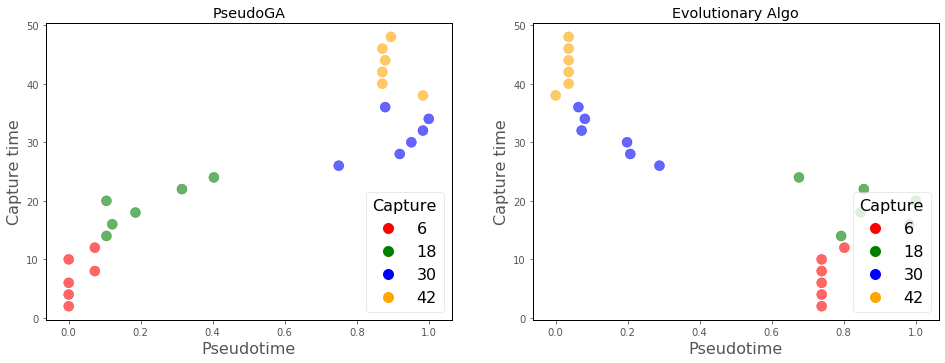

In [53]:
mdata = pd.read_csv('WindramMetaData.csv', index_col = [0])

actual_capture_time = mdata['capture.orig'].values
#print(actual_capture_time)
pseudotime = list(Pseudotime)

print(pseudotime)

pseudotime_pseudoGA = [.00000000, 0.00000000, 0.00000000, 0.07258065, 0.00000000, 0.07258065, 
                       0.10483871, 0.12096774, 0.18548387, 0.10483871, 0.31451613, 0.40322581, 0.75000000, 0.91935484, 0.95161290, 0.98387097, 1.00000000, 0.87903226,0.98387097, 0.87096774, 0.87096774, 0.87903226, 0.87096774, 0.89516129  ]
                        #0.926829268
pseudotime_pseudoGA = list(pseudotime_pseudoGA)
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('PseudoGA', 'Pseudotime', 'Capture time', pseudotime_pseudoGA, actual_capture_time, mdata['capture'].values)
plt.subplot(2, 2, 2)
plot('Evolutionary Algo', 'Pseudotime', 'Capture time', pseudotime, actual_capture_time, mdata['capture'].values)

In [52]:
%matplotlib inline
#from utils import plot
from matplotlib import pyplot as plt
import seaborn as sns
#0.014925373134328358, 0.014925373134328358, 0.014925373134328358, 0.3219616204690831, 0.014925373134328358, 0.3219616204690831, 0.19402985074626866, 0.0831556503198294, 0.0, 0.19402985074626866, 0.34328358208955223, 0.2707889125799573, 0.746268656716418, 1.0, 0.8656716417910447, 0.7014925373134329, 0.7910447761194029, 0.6119402985074627, 0.7313432835820896, 0.6865671641791045, 0.6865671641791045, 0.8507462686567164, 0.6865671641791045, 0.7313432835820896
#1.0, 1.0, 1.0, 0.875, 1.0, 0.875, 0.75, 0.8611111111111112, 0.7777777777777778, 0.75, 0.4722222222222222, 0.3194444444444444, 0.3055555555555556, 0.20833333333333334, 0.18055555555555555, 0.2638888888888889, 0.1527777777777778, 0.1527777777777778, 0.0, 0.06944444444444445, 0.06944444444444445, 0.08333333333333333, 0.06944444444444445, 0.3055555555555556

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import  numpy as np
import  pandas as pd
from collections import OrderedDict
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
# plt.rc('axes', color_cycle=['royalblue', 'orange', 'green', 'red', 'blueviolet', 'sienna', 'hotpink', 'gray', 'y', 'c'])
# plt.rc('axes', color_cycle=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y'])
plt.rc('axes', prop_cycle=cycler(color=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y']))
# axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])


def plot(title, xLabel, yLabel, xData, yData, cpt, xErr=None, **kwargs):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    # plt.figure(figsize=(8, 6))
    plt.title( '%s' % ( title ) )
    plt.xlabel('%s' % (xLabel), fontsize=16)
    plt.ylabel('%s' % (yLabel), fontsize=16)

    cellCapture = OrderedDict((('6', 'red'), ('18', 'green'), ('30', 'blue'), ('42', 'orange')))
    color_map = [0 for i in range(len(cpt))]

    for i in range(0, len(cpt)):
        if cpt[i] == 6:
            color_map[i] = 'red'
        elif cpt[i] == 18:
            color_map[i] = 'green'
        elif cpt[i] == 30:
            color_map[i] = 'blue'
        else:
            color_map[i] = 'orange'

    if 'datset' in kwargs:
        cellCapture = OrderedDict((('0', 'red'), ('2', 'green'), ('4', 'blue'), ('7', 'orange')))
        for i in range(0, len(cpt)):
            if cpt[i] == 1:
                color_map[i] = 'red'
            elif cpt[i] == 2:
                color_map[i] = 'green'
            elif cpt[i] == 3:
                color_map[i] = 'blue'
            else:
                color_map[i] = 'orange'

    # print(cellCapture)
    markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', ms=10, linestyle='') for color in cellCapture.values()]

    plt.scatter(xData, yData, 100, c=color_map, alpha=0.6)
    if xErr is not None:
        plt.errorbar(xData, yData, xerr=xErr, fmt='none', marker='none', ecolor=color_map)

    # l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', bbox_to_anchor=(1.1, 0.5), loc=10, fontsize=16)
    l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', loc=4, fontsize=16)
    plt.setp(l.get_title(), fontsize=16)
    # plt.show()
